<a href="https://colab.research.google.com/github/chethan1996/Demand-Forecast-Predict/blob/master/demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VTP_DemandData_V2.0

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_excel('VTP_Demand_Data_Latest.xlsx')
df.head()

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (DD/MM/YY),Year
0,TCP,DHIG,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020
1,TCP,DHIG,Parcel - Dummy,1000,KG,1000,CM3,2020-08-01,2020
2,TCP,TML,Parcel - Dummy,200,KG,200,CM3,2020-08-01,2020
3,TCP,BXO,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020
4,TCP,TTM,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020


# Preprocessing

In [3]:
df['month'] = pd.DatetimeIndex(df['Customer Requested Delivery Date (DD/MM/YY)']).month

In [4]:
df['day'] = pd.DatetimeIndex(df['Customer Requested Delivery Date (DD/MM/YY)']).day

In [5]:
df.head()

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (DD/MM/YY),Year,month,day
0,TCP,DHIG,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
1,TCP,DHIG,Parcel - Dummy,1000,KG,1000,CM3,2020-08-01,2020,8,1
2,TCP,TML,Parcel - Dummy,200,KG,200,CM3,2020-08-01,2020,8,1
3,TCP,BXO,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
4,TCP,TTM,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1


In [6]:
df['Year'].value_counts()

2020    68518
Name: Year, dtype: int64

In [7]:
df_test = df[df['Year']==2020]

In [8]:
df_test

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (DD/MM/YY),Year,month,day
0,TCP,DHIG,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
1,TCP,DHIG,Parcel - Dummy,1000,KG,1000,CM3,2020-08-01,2020,8,1
2,TCP,TML,Parcel - Dummy,200,KG,200,CM3,2020-08-01,2020,8,1
3,TCP,BXO,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
4,TCP,TTM,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
...,...,...,...,...,...,...,...,...,...,...,...
68513,ADV,HAT,Parcel - Dummy,5900,KG,5900,CM3,2020-08-31,2020,8,31
68514,ADV,TCU,Parcel - Dummy,5800,KG,5800,CM3,2020-08-31,2020,8,31
68515,ADV,TIS,Parcel - Dummy,5800,KG,5800,CM3,2020-08-31,2020,8,31
68516,ADV,XAL,Parcel - Dummy,16000,KG,16000,CM3,2020-08-31,2020,8,31


In [9]:
df_train = df[df['Year']!=2020]

**Splitting Dataset to Train and Test** 



In [12]:
df_train=df.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df.drop(df_train.index)

In [13]:
df_train

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (DD/MM/YY),Year,month,day
65184,TNN,BTG,Parcel - Dummy,500,KG,500,CM3,2020-08-30,2020,8,30
37024,TNN,TGNT,Parcel - Dummy,500,KG,500,CM3,2020-08-17,2020,8,17
63316,TBH,YMY,Parcel - Dummy,110,KG,110,CM3,2020-08-29,2020,8,29
65472,TBH,DGS,Parcel - Dummy,100,KG,100,CM3,2020-08-31,2020,8,31
23599,TBH,THH,Parcel - Dummy,2210,KG,2210,CM3,2020-08-11,2020,8,11
...,...,...,...,...,...,...,...,...,...,...,...
3984,TNN,DHY,Parcel - Dummy,615,KG,615,CM3,2020-08-03,2020,8,3
47011,ADV,BTN,Parcel - Dummy,50,KG,50,CM3,2020-08-21,2020,8,21
8869,ADV,AND,Parcel - Dummy,1000,KG,1000,CM3,2020-08-05,2020,8,5
11567,TBH,DVN,Parcel - Dummy,1100,KG,1100,CM3,2020-08-06,2020,8,6


In [14]:
df_test

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (DD/MM/YY),Year,month,day
2,TCP,TML,Parcel - Dummy,200,KG,200,CM3,2020-08-01,2020,8,1
3,TCP,BXO,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
4,TCP,TTM,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
5,TCP,TPGG,Parcel - Dummy,200,KG,200,CM3,2020-08-01,2020,8,1
17,TNN,STNN,Parcel - Dummy,50,KG,50,CM3,2020-08-01,2020,8,1
...,...,...,...,...,...,...,...,...,...,...,...
68497,ADV,LNN,Parcel - Dummy,100,KG,100,CM3,2020-08-31,2020,8,31
68505,ADV,HBHNDP,Parcel - Dummy,100,KG,100,CM3,2020-08-31,2020,8,31
68511,ADV,TGG,Parcel - Dummy,35000,KG,35000,CM3,2020-08-31,2020,8,31
68513,ADV,HAT,Parcel - Dummy,5900,KG,5900,CM3,2020-08-31,2020,8,31


In [15]:
df_train.isnull().sum()

Origin                                          0
Destination                                    26
Item                                            0
Weight                                          0
Weight UoM                                      0
Size/Volume                                     0
Volume UoM                                      0
Customer Requested Delivery Date (DD/MM/YY)     0
Year                                            0
month                                           0
day                                             0
dtype: int64

In [16]:
df_train.dtypes

Origin                                                 object
Destination                                            object
Item                                                   object
Weight                                                  int64
Weight UoM                                             object
Size/Volume                                             int64
Volume UoM                                             object
Customer Requested Delivery Date (DD/MM/YY)    datetime64[ns]
Year                                                    int64
month                                                   int64
day                                                     int64
dtype: object

In [17]:
df_train.head()

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (DD/MM/YY),Year,month,day
65184,TNN,BTG,Parcel - Dummy,500,KG,500,CM3,2020-08-30,2020,8,30
37024,TNN,TGNT,Parcel - Dummy,500,KG,500,CM3,2020-08-17,2020,8,17
63316,TBH,YMY,Parcel - Dummy,110,KG,110,CM3,2020-08-29,2020,8,29
65472,TBH,DGS,Parcel - Dummy,100,KG,100,CM3,2020-08-31,2020,8,31
23599,TBH,THH,Parcel - Dummy,2210,KG,2210,CM3,2020-08-11,2020,8,11


In [18]:
df1 = df_train.iloc[:,[0,1,2,3,5,8,9,10]]
df2 = df_test.iloc[:,[0,1,2,3,5,8,9,10]]

In [19]:
df1

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
65184,TNN,BTG,Parcel - Dummy,500,500,2020,8,30
37024,TNN,TGNT,Parcel - Dummy,500,500,2020,8,17
63316,TBH,YMY,Parcel - Dummy,110,110,2020,8,29
65472,TBH,DGS,Parcel - Dummy,100,100,2020,8,31
23599,TBH,THH,Parcel - Dummy,2210,2210,2020,8,11
...,...,...,...,...,...,...,...,...
3984,TNN,DHY,Parcel - Dummy,615,615,2020,8,3
47011,ADV,BTN,Parcel - Dummy,50,50,2020,8,21
8869,ADV,AND,Parcel - Dummy,1000,1000,2020,8,5
11567,TBH,DVN,Parcel - Dummy,1100,1100,2020,8,6


In [20]:
df2

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
2,TCP,TML,Parcel - Dummy,200,200,2020,8,1
3,TCP,BXO,Parcel - Dummy,500,500,2020,8,1
4,TCP,TTM,Parcel - Dummy,500,500,2020,8,1
5,TCP,TPGG,Parcel - Dummy,200,200,2020,8,1
17,TNN,STNN,Parcel - Dummy,50,50,2020,8,1
...,...,...,...,...,...,...,...,...
68497,ADV,LNN,Parcel - Dummy,100,100,2020,8,31
68505,ADV,HBHNDP,Parcel - Dummy,100,100,2020,8,31
68511,ADV,TGG,Parcel - Dummy,35000,35000,2020,8,31
68513,ADV,HAT,Parcel - Dummy,5900,5900,2020,8,31


In [21]:
for col in df1.columns:
    print(col,':' ,len(df1[col].unique()))

Origin : 5
Destination : 1251
Item : 1
Weight : 1451
Size/Volume : 1451
Year : 1
month : 1
day : 31


In [22]:
for col in df2.columns:
    print(col,':' ,len(df2[col].unique()))

Origin : 5
Destination : 1157
Item : 1
Weight : 727
Size/Volume : 727
Year : 1
month : 1
day : 31


In [23]:
labels = df1['Origin'].astype('category').cat.categories.tolist()

labels1 = df1['Destination'].astype('category').cat.categories.tolist()

labels2 = df1['Item'].astype('category').cat.categories.tolist()

In [26]:
replace_map_comp = {'Origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map_comp1 = {'Destination' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}
replace_map_comp2 = {'Item' : {k: v for k,v in zip(labels2,list(range(1,len(labels2)+1)))}}

In [27]:
tst_labels = df2['Origin'].astype('category').cat.categories.tolist()

tst_labels1 = df2['Destination'].astype('category').cat.categories.tolist()

tst_labels2 = df2['Item'].astype('category').cat.categories.tolist()

In [28]:
replace_map_comp3 = {'Origin' : {k: v for k,v in zip(tst_labels,list(range(1,len(tst_labels)+1)))}}
replace_map_comp4 = {'Destination' : {k: v for k,v in zip(tst_labels1,list(range(1,len(tst_labels1)+1)))}}
replace_map_comp5 = {'Item' : {k: v for k,v in zip(tst_labels2,list(range(1,len(tst_labels2)+1)))}}

In [29]:
df1.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
65184,TNN,BTG,Parcel - Dummy,500,500,2020,8,30
37024,TNN,TGNT,Parcel - Dummy,500,500,2020,8,17
63316,TBH,YMY,Parcel - Dummy,110,110,2020,8,29
65472,TBH,DGS,Parcel - Dummy,100,100,2020,8,31
23599,TBH,THH,Parcel - Dummy,2210,2210,2020,8,11


In [30]:
df2.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
2,TCP,TML,Parcel - Dummy,200,200,2020,8,1
3,TCP,BXO,Parcel - Dummy,500,500,2020,8,1
4,TCP,TTM,Parcel - Dummy,500,500,2020,8,1
5,TCP,TPGG,Parcel - Dummy,200,200,2020,8,1
17,TNN,STNN,Parcel - Dummy,50,50,2020,8,1


In [31]:
df1.replace(replace_map_comp, inplace=True)
df1.replace(replace_map_comp1, inplace=True)
df1.replace(replace_map_comp2, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [32]:
df2.replace(replace_map_comp3, inplace=True)
df2.replace(replace_map_comp4, inplace=True)
df2.replace(replace_map_comp5, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [33]:
df1.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
65184,5,96.0,1,500,500,2020,8,30
37024,5,1019.0,1,500,500,2020,8,17
63316,3,1244.0,1,110,110,2020,8,29
65472,3,266.0,1,100,100,2020,8,31
23599,3,1030.0,1,2210,2210,2020,8,11


In [34]:
df2.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
2,4,978.0,1,200,200,2020,8,1
3,4,107.0,1,500,500,2020,8,1
4,4,1041.0,1,500,500,2020,8,1
5,4,1017.0,1,200,200,2020,8,1
17,5,895.0,1,50,50,2020,8,1


# Data Analysis

In [35]:
import seaborn as sns

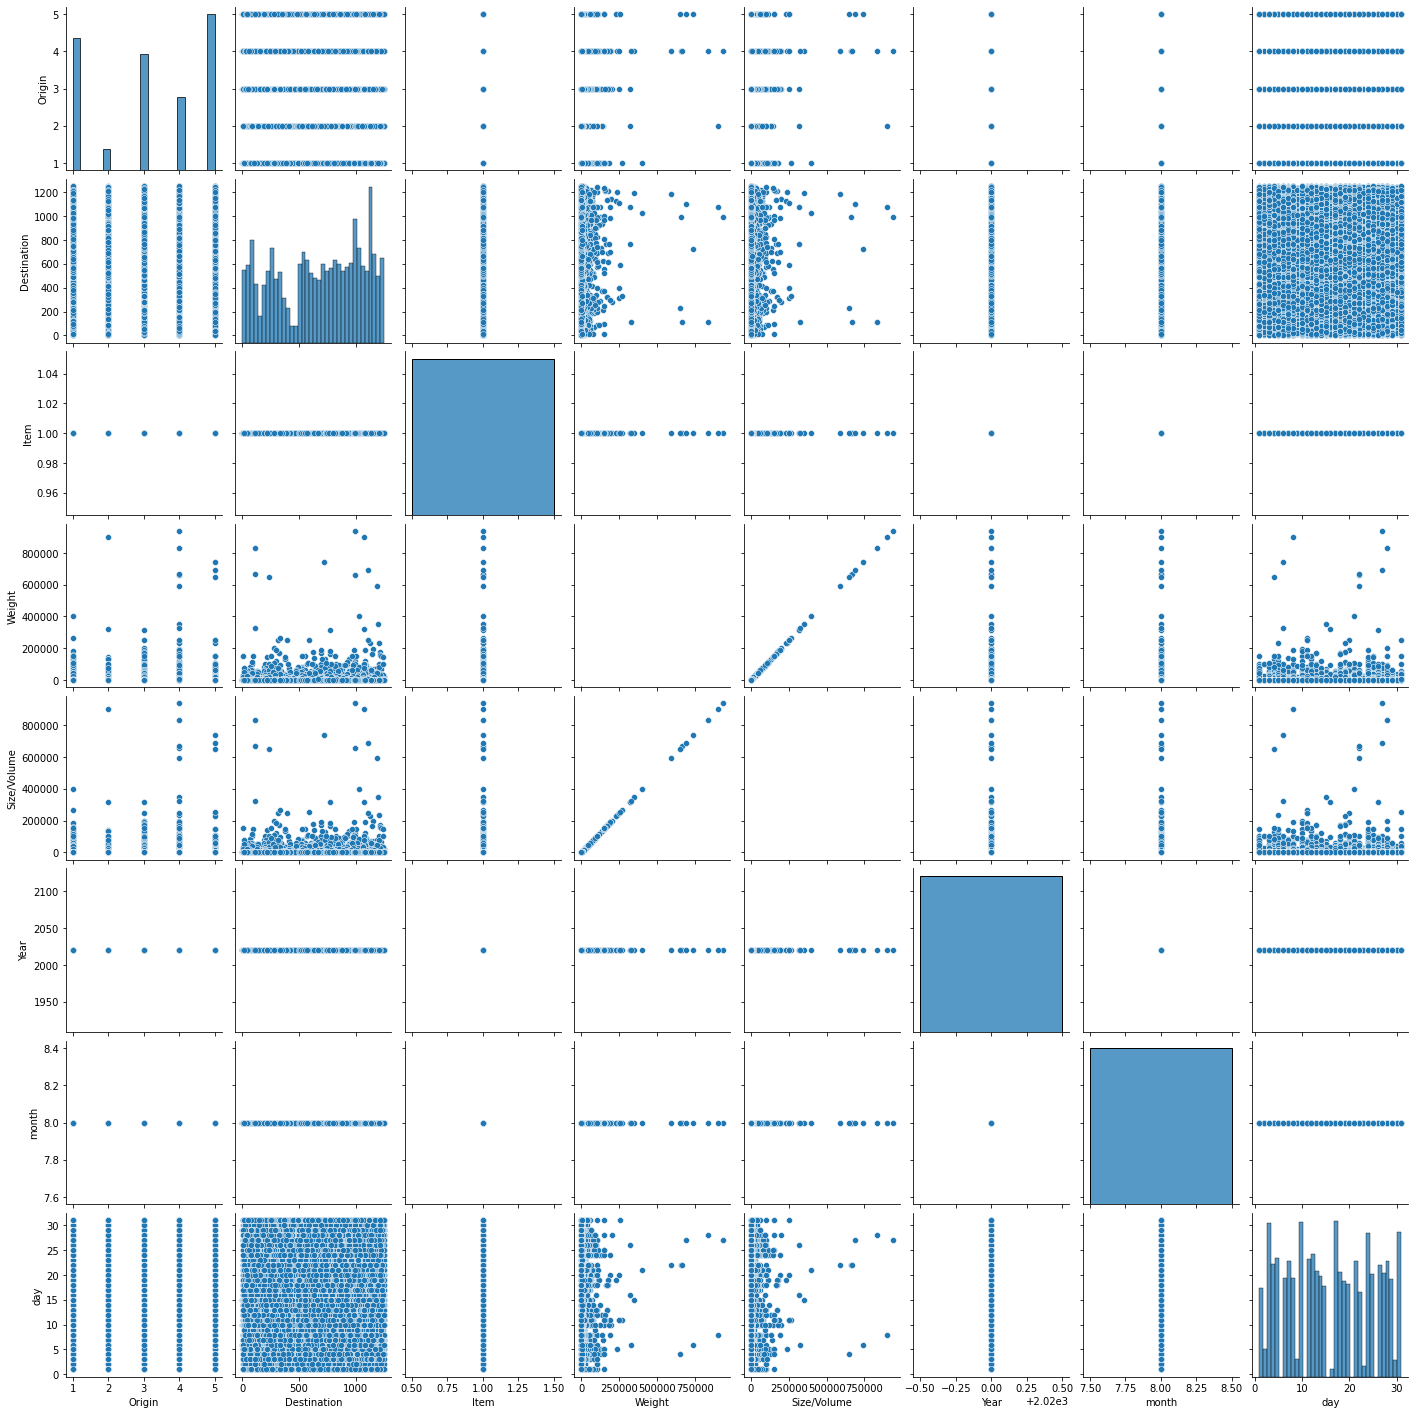

In [36]:
sns.pairplot(df1)

In [37]:
target = 'Weight'

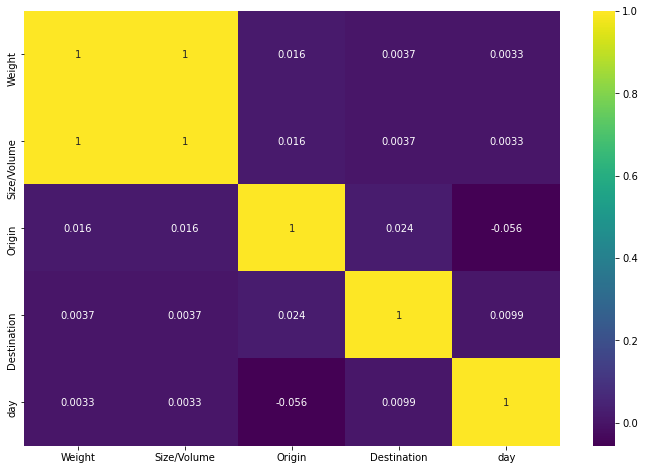

In [38]:
k = 8 #number of variables for heatmap
cols = df1.corr().nlargest(k, target)[target].index
cm = df1[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [39]:
X_trn = df1.iloc[:,[0,1,2,5,6,7]]
X_tst = df2.iloc[:,[0,1,2,5,6,7]]

In [40]:
X_trn

,Origin,Destination,Item,Year,month,day
65184,5,96.0,1,2020,8,30
37024,5,1019.0,1,2020,8,17
63316,3,1244.0,1,2020,8,29
65472,3,266.0,1,2020,8,31
23599,3,1030.0,1,2020,8,11
...,...,...,...,...,...,...
3984,5,276.0,1,2020,8,3
47011,1,99.0,1,2020,8,21
8869,1,16.0,1,2020,8,5
11567,3,333.0,1,2020,8,6


In [41]:
X_tst

,Origin,Destination,Item,Year,month,day
2,4,978.0,1,2020,8,1
3,4,107.0,1,2020,8,1
4,4,1041.0,1,2020,8,1
5,4,1017.0,1,2020,8,1
17,5,895.0,1,2020,8,1
...,...,...,...,...,...,...
68497,1,614.0,1,2020,8,31
68505,1,388.0,1,2020,8,31
68511,1,928.0,1,2020,8,31
68513,1,358.0,1,2020,8,31


In [42]:
y_trn = df1.iloc[:,[3,4]]
y_trn

,Weight,Size/Volume
65184,500,500
37024,500,500
63316,110,110
65472,100,100
23599,2210,2210
...,...,...
3984,615,615
47011,50,50
8869,1000,1000
11567,1100,1100


In [43]:
y_tst = df2.iloc[:,[3,4]]
y_tst

,Weight,Size/Volume
2,200,200
3,500,500
4,500,500
5,200,200
17,50,50
...,...,...
68497,100,100
68505,100,100
68511,35000,35000
68513,5900,5900


In [44]:
df1.dtypes

Origin           int64
Destination    float64
Item             int64
Weight           int64
Size/Volume      int64
Year             int64
month            int64
day              int64
dtype: object

In [45]:
df2.dtypes

Origin           int64
Destination    float64
Item             int64
Weight           int64
Size/Volume      int64
Year             int64
month            int64
day              int64
dtype: object

In [46]:
pd.isna(df['Destination'])


0        False
1        False
2        False
3        False
4        False
         ...  
68513    False
68514    False
68515    False
68516    False
68517    False
Name: Destination, Length: 68518, dtype: bool

In [47]:
df[df['day'] == ''].index

Int64Index([], dtype='int64')

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
model = RandomForestRegressor()
#filling missing value
X_trn = X_trn.fillna(X_trn.mean())
X_tst = X_tst.fillna(X_tst.mean()) 
# Fit on training data
model.fit(X_trn,y_trn)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
prd = model.predict(X_tst)

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tst,prd)
rmse = np.sqrt(mse)
rmse

30520.261846400554

In [51]:
prd

array([[1492.25      , 1492.25      ],
       [9976.33333333, 9976.33333333],
       [ 429.97833333,  429.97833333],
       ...,
       [ 269.60059524,  269.60059524],
       [ 320.        ,  320.        ],
       [ 551.08333333,  551.08333333]])

In [52]:
from sklearn import datasets, linear_model

In [53]:
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets 
regr.fit(X_trn,y_trn) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
prd1 = regr.predict(X_tst)

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tst,prd1)
rmse = np.sqrt(mse)
rmse

29339.78718772684

In [56]:
from sklearn import neighbors

In [57]:
knn = neighbors.KNeighborsRegressor()
y_ = knn.fit(X_trn,y_trn)

In [58]:
prd2 = y_.predict(X_tst)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_tst,prd2)
rmse = np.sqrt(mse)
rmse

29738.084409567404

In [60]:
r2_score(y_tst,prd1) 

8.577196195791448e-05

In [61]:
X_tst.shape

(13704, 6)

In [62]:
y_tst.shape

(13704, 2)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [65]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [67]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
rf_random.fit(X_trn,y_trn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  23.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  25.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  23.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  23.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  23.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  39.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 24.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [69]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'n_estimators': 300}

In [70]:
rf_random.best_score_

-151455129.35915607

In [71]:

predictions=rf_random.predict(X_tst)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


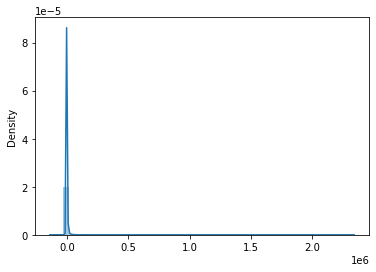

In [72]:
sns.distplot(y_tst-predictions)

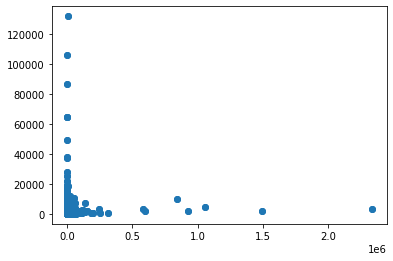

In [73]:

plt.scatter(y_tst,predictions)

In [74]:
from sklearn import metrics

In [75]:
print('MAE:', metrics.mean_absolute_error(y_tst, predictions))
print('MSE:', metrics.mean_squared_error(y_tst, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_tst, predictions)))

MAE: 2620.0500248450726
MSE: 862892420.3862644
RMSE: 29375.030559750307


In [76]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date, timedelta

In [77]:
numpy_data = np.array(['2', '2', '2020-01-01','2020-01-05'])

In [79]:
dt1 = datetime.strptime(numpy_data[2], '%Y-%m-%d')
dt2 = datetime.strptime(numpy_data[3], '%Y-%m-%d')

sdate = date(dt1.year, dt1.month, dt1.day)   # start date
edate = date(dt2.year, dt2.month, dt2.day)   # end date

delta = edate - sdate  

a= len(range(delta.days+1))
ex = {}
result = {}
for i in range(delta.days + 1):
    day =str(sdate + timedelta(days=i))
    dt = datetime.strptime(day, '%Y-%m-%d')
    
    d={'origin':[numpy_data[0]]*10,
        'dest':[numpy_data[1]]*10,
        'item':list(range(1,11)),
        'year':[dt.year]*10,
        'month':[dt.month]*10,
        'day':[dt.day]*10}
    
    
    for key in (d.keys()):
        if key in d:
            result.setdefault(key, []).extend(d[key])
    
dfs1 = pd.DataFrame(result)
    


In [80]:
dfs1

,origin,dest,item,year,month,day
0,2,2,1,2020,1,1
1,2,2,2,2020,1,1
2,2,2,3,2020,1,1
3,2,2,4,2020,1,1
4,2,2,5,2020,1,1
5,2,2,6,2020,1,1
6,2,2,7,2020,1,1
7,2,2,8,2020,1,1
8,2,2,9,2020,1,1
9,2,2,10,2020,1,1


In [81]:
final_pred = model.predict(dfs1)

In [82]:
final_pred

array([[2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2476.76666667, 2476.76666667],
       [2486.81666667, 2486.81666667],
       [2486.81666667, 2486.81666667],
       [2486.81666667, 2486.81666667],
       [2486.81666667, 2486.81666667],
       [2486.81666667, 2486.81666667],
       [2486.81666667, 24

In [83]:
final_pred[0][1]

2476.7666666666664

In [84]:
waight=[]
volume=[]
for i in range(len(final_pred)):
    waight.append(final_pred[i][0])
    volume.append(final_pred[i][1])



In [85]:
len(waight)

50

In [86]:
numpy_data[0]

'2'

In [87]:
origin_replace ={1: 'Bình Dương ',
 2: 'Bình Phước ',
 3: 'Bình Định ',
 4: 'Bắc Giang ',
 5: 'Bắc Kạn ',
 6: 'Bắc Ninh ',
 7: 'Cao Bằng ',
 8: 'Cà Mau ',
 9: 'Gia Lai ',
 10: 'Hà Giang ',
 11: 'Hà Nam ',
 12: 'Hà Tĩnh ',
 13: 'Hải Dương ',
 14: 'Hải Phòng ',
 15: 'Hoà Bình ',
 16: 'Khánh Hoà '}


In [88]:
origin_replace

{1: 'Bình Dương ',
 2: 'Bình Phước ',
 3: 'Bình Định ',
 4: 'Bắc Giang ',
 5: 'Bắc Kạn ',
 6: 'Bắc Ninh ',
 7: 'Cao Bằng ',
 8: 'Cà Mau ',
 9: 'Gia Lai ',
 10: 'Hà Giang ',
 11: 'Hà Nam ',
 12: 'Hà Tĩnh ',
 13: 'Hải Dương ',
 14: 'Hải Phòng ',
 15: 'Hoà Bình ',
 16: 'Khánh Hoà '}

In [89]:
origin_replace[1]

'Bình Dương '

In [90]:
dest_replace = {'Kon Tum ': 1,
  'Lào Cai ': 2,
  'Lạng Sơn ': 3,
  'Long An ': 4,
  'Nam Định ': 5,
  'Ninh Bình ': 6,
  'Phú Thọ ': 7,
  'Quảng Bình ': 8,
  'Quảng Nam ': 9,
  'Quảng Ngãi ': 10,
  'Quảng Ninh ': 11,
  'Quảng Trị ': 12,
  'Sóc Trăng ': 13,
  'Sơn La ': 14,
  'Thanh Hoá ': 15,
  'Thái Bình ': 16,
  'Trà Vinh ': 17,
  'Vĩnh Long ': 18}

In [94]:
orig=[]
dest=[]
v1= int(numpy_data[0])
v2= int(numpy_data[1])
for i in range(1,len(origin_replace)+1):
    if v1 == i :
        orig = origin_replace[i]
    
    if v2 == i :
        dest = dest_replace[i]
        
    
print(orig,dest)

Bình Phước  Lào Cai 


In [95]:

dfs1['predected waight']= waight
dfs1['predected volume']= volume

In [96]:
len(final_pred)

50

In [97]:
dfs1.head()

,origin,dest,item,year,month,day,predected waight,predected volume
0,2,2,1,2020,1,1,2476.766667,2476.766667
1,2,2,2,2020,1,1,2476.766667,2476.766667
2,2,2,3,2020,1,1,2476.766667,2476.766667
3,2,2,4,2020,1,1,2476.766667,2476.766667
4,2,2,5,2020,1,1,2476.766667,2476.766667


In [98]:
dfs1.shape

(50, 8)

In [99]:
volume

[2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2476.7666666666664,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2486.8166666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2575.5666666666666,
 2621.5,
 2621.5,
 2621.5,
 2621.5,
 2621.5,
 2621.5,
 2621.5,
 2621.5,
 2621.5,
 2621.5]

In [100]:
dfs1['myDt']=pd.to_datetime(dfs1[['year','month','day']])

In [101]:
dfs1 = dfs1.drop(['year','month','day','origin','dest'], axis =1) 

In [102]:
dfs1.head()

,item,predected waight,predected volume,myDt
0,1,2476.766667,2476.766667,2020-01-01
1,2,2476.766667,2476.766667,2020-01-01
2,3,2476.766667,2476.766667,2020-01-01
3,4,2476.766667,2476.766667,2020-01-01
4,5,2476.766667,2476.766667,2020-01-01


In [103]:
replace_map_comp1

{'Destination': {'A98': 1,
  'ABC': 2,
  'ABH': 3,
  'ABN': 4,
  'ACU': 5,
  'ADV': 6,
  'AGG': 7,
  'AHA': 8,
  'AKE': 9,
  'AKH': 10,
  'ALC': 11,
  'ALI': 12,
  'ALO': 13,
  'AMH': 14,
  'AMY': 15,
  'AND': 16,
  'ANDG': 17,
  'ANHA': 18,
  'ANK': 19,
  'ANN': 20,
  'ANP': 21,
  'ANT': 22,
  'ANTI': 23,
  'ANU': 24,
  'APA': 25,
  'ASN': 26,
  'ATG': 27,
  'ATI': 28,
  'ATY': 29,
  'BAI': 30,
  'BAN': 31,
  'BAT': 32,
  'BBE': 33,
  'BBG': 34,
  'BBH': 35,
  'BCGG': 36,
  'BCH': 37,
  'BCNG': 38,
  'BCSN': 39,
  'BCT': 40,
  'BCU': 41,
  'BDE': 42,
  'BDG': 43,
  'BDGTHA': 44,
  'BDHALO': 45,
  'BDHHAN': 46,
  'BDHVTH': 47,
  'BDI': 48,
  'BDN': 49,
  'BDP': 50,
  'BGGSDG': 51,
  'BHA': 52,
  'BHCN': 53,
  'BHD': 54,
  'BHDH': 55,
  'BHG': 56,
  'BHHA': 57,
  'BHI': 58,
  'BHL': 59,
  'BHMH': 60,
  'BHN': 61,
  'BHO': 62,
  'BHS': 63,
  'BHT': 64,
  'BKA': 65,
  'BKNBTG': 66,
  'BKNNSN': 67,
  'BKNPNM': 68,
  'BLC': 69,
  'BLG': 70,
  'BLU': 71,
  'BLUDHI': 72,
  'BLUG': 73,
  'BMH'

In [104]:
dest_replace = dict([(value, key) for key, value in dest_replace.items()]) 

In [105]:
dest_replace ={1: 'Kon Tum ',
 2: 'Lào Cai ',
 3: 'Lạng Sơn ',
 4: 'Long An ',
 5: 'Nam Định ',
 6: 'Ninh Bình ',
 7: 'Phú Thọ ',
 8: 'Quảng Bình ',
 9: 'Quảng Nam ',
 10: 'Quảng Ngãi ',
 11: 'Quảng Ninh ',
 12: 'Quảng Trị ',
 13: 'Sóc Trăng ',
 14: 'Sơn La ',
 15: 'Thanh Hoá ',
 16: 'Thái Bình ',
 17: 'Trà Vinh ',
 18: 'Vĩnh Long '}

In [107]:
dfs1.replace("Dummy-Parcel", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


item                None
predected waight    None
predected volume    None
myDt                None
dtype: object

In [108]:
dfs1.head()

,item,predected waight,predected volume,myDt
0,1,2476.766667,2476.766667,2020-01-01
1,2,2476.766667,2476.766667,2020-01-01
2,3,2476.766667,2476.766667,2020-01-01
3,4,2476.766667,2476.766667,2020-01-01
4,5,2476.766667,2476.766667,2020-01-01


In [109]:
df_test.head()

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (DD/MM/YY),Year,month,day
2,TCP,TML,Parcel - Dummy,200,KG,200,CM3,2020-08-01,2020,8,1
3,TCP,BXO,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
4,TCP,TTM,Parcel - Dummy,500,KG,500,CM3,2020-08-01,2020,8,1
5,TCP,TPGG,Parcel - Dummy,200,KG,200,CM3,2020-08-01,2020,8,1
17,TNN,STNN,Parcel - Dummy,50,KG,50,CM3,2020-08-01,2020,8,1


In [110]:
df2 = df_test.iloc[:,[0,1,2,3,5,8,9,10]]

In [111]:
df2.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
2,TCP,TML,Parcel - Dummy,200,200,2020,8,1
3,TCP,BXO,Parcel - Dummy,500,500,2020,8,1
4,TCP,TTM,Parcel - Dummy,500,500,2020,8,1
5,TCP,TPGG,Parcel - Dummy,200,200,2020,8,1
17,TNN,STNN,Parcel - Dummy,50,50,2020,8,1


In [112]:
replace_map_comp2

{'Item': {'Parcel - Dummy': 1}}

In [113]:
df2.replace(replace_map_comp3, inplace=True)
df2.replace(replace_map_comp4, inplace=True)
df2.replace(replace_map_comp5, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [114]:
df2.tail()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
68497,1,614.0,1,100,100,2020,8,31
68505,1,388.0,1,100,100,2020,8,31
68511,1,928.0,1,35000,35000,2020,8,31
68513,1,358.0,1,5900,5900,2020,8,31
68514,1,915.0,1,5800,5800,2020,8,31


In [115]:
X_tst = df2.iloc[:,[0,1,2,5,6,7]]

In [116]:
y_tst = df2.iloc[:,[3,4]]

In [121]:
X_tst.head()

,Origin,Destination,Item,Year,month,day
2,4,978.0,1,2020,8,1
3,4,107.0,1,2020,8,1
4,4,1041.0,1,2020,8,1
5,4,1017.0,1,2020,8,1
17,5,895.0,1,2020,8,1


In [122]:
X_tst = X_tst.fillna(X_tst.mean())
rf_predictions = model.predict(X_tst)

In [123]:
predictions = model.predict(X_tst)

In [124]:
rf_predictions

array([[1492.25      , 1492.25      ],
       [9976.33333333, 9976.33333333],
       [ 429.97833333,  429.97833333],
       ...,
       [ 269.60059524,  269.60059524],
       [ 320.        ,  320.        ],
       [ 551.08333333,  551.08333333]])

In [125]:
import pickle


# Saving model to disk
pickle.dump(model, open('Forecast_Latest.pkl','wb',),protocol=2)

# Loading model to compare the results
frecast = pickle.load(open('Forecast_Latest.pkl','rb'))

In [126]:
predictions = frecast.predict(X_tst)

In [129]:
predictions

array([[1492.25      , 1492.25      ],
       [9976.33333333, 9976.33333333],
       [ 429.97833333,  429.97833333],
       ...,
       [ 269.60059524,  269.60059524],
       [ 320.        ,  320.        ],
       [ 551.08333333,  551.08333333]])

In [ ]:
predictions[0] = predictions[0].toFixed(2)

In [130]:
x = np.round(predictions, decimals=3)

In [131]:
x

array([[1492.25 , 1492.25 ],
       [9976.333, 9976.333],
       [ 429.978,  429.978],
       ...,
       [ 269.601,  269.601],
       [ 320.   ,  320.   ],
       [ 551.083,  551.083]])

In [132]:
predictions

array([[1492.25      , 1492.25      ],
       [9976.33333333, 9976.33333333],
       [ 429.97833333,  429.97833333],
       ...,
       [ 269.60059524,  269.60059524],
       [ 320.        ,  320.        ],
       [ 551.08333333,  551.08333333]])

In [133]:
rf_predictions

array([[1492.25      , 1492.25      ],
       [9976.33333333, 9976.33333333],
       [ 429.97833333,  429.97833333],
       ...,
       [ 269.60059524,  269.60059524],
       [ 320.        ,  320.        ],
       [ 551.08333333,  551.08333333]])

In [134]:
y_tst

,Weight,Size/Volume
2,200,200
3,500,500
4,500,500
5,200,200
17,50,50
...,...,...
68497,100,100
68505,100,100
68511,35000,35000
68513,5900,5900


In [135]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tst,rf_predictions)
rmse = np.sqrt(mse)
rmse

30520.261846400554

In [136]:
numpy_data = np.array(['2', '2', '2020-06-18'])

In [137]:
numpy_data[2]

'2020-06-18'

In [138]:
dt = datetime.strptime(numpy_data[2], '%Y-%m-%d')

In [139]:
print(dt.year, dt.month, dt.day)

2020 6 18


In [140]:
import pandas as pd

d={'origin':[numpy_data[0]]*10,
   'dest':[numpy_data[1]]*10,
   'item':list(range(1,11)),
  'year':[dt.year]*10,
  'month':[dt.month]*10,
  'day':[dt.day]*10}
df=pd.DataFrame(d)
df_lags=pd.DataFrame()

In [141]:
df

,origin,dest,item,year,month,day
0,2,2,1,2020,6,18
1,2,2,2,2020,6,18
2,2,2,3,2020,6,18
3,2,2,4,2020,6,18
4,2,2,5,2020,6,18
5,2,2,6,2020,6,18
6,2,2,7,2020,6,18
7,2,2,8,2020,6,18
8,2,2,9,2020,6,18
9,2,2,10,2020,6,18


In [142]:
X_tst

,Origin,Destination,Item,Year,month,day
2,4,978.0,1,2020,8,1
3,4,107.0,1,2020,8,1
4,4,1041.0,1,2020,8,1
5,4,1017.0,1,2020,8,1
17,5,895.0,1,2020,8,1
...,...,...,...,...,...,...
68497,1,614.0,1,2020,8,31
68505,1,388.0,1,2020,8,31
68511,1,928.0,1,2020,8,31
68513,1,358.0,1,2020,8,31


In [143]:
prd = model.predict(df)

In [144]:
prd

array([[3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1],
       [3011.1, 3011.1]])

In [145]:
prd[0][0]

3011.1